# Industry Classification

**Author:** Chris Russo <br>
**Created on:** 2017-05-05 <br>

### Goal
The goal of this exercise is to extract features from company names in order to accurately predict which industry the company belongs to. 

### Configure environment

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

In [2]:
# Import natural language processing tools
import re
import nltk
import string

In [3]:
# Download and import stopwords package
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import data

In [4]:
# Read private US companies data into DataFrame
companies = pd.read_csv('data/private_us_companies.csv')

### Explore companies data

In [5]:
# Check companies meta data
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327684 entries, 0 to 327683
Data columns (total 2 columns):
Company     327684 non-null object
Industry    327684 non-null object
dtypes: object(2)
memory usage: 5.0+ MB


In [6]:
# Rename columns
companies.rename(columns={'Company': 'company', 'Industry': 'industry'}, inplace=True)

In [7]:
# View head of companies data
companies.head(10)

,company,industry
0,A - E Employees Credit Union,Diversified Financial Services
1,"A & A Contract Services, Inc.",Professional Services
2,"A & A Express, Inc.",Road and Rail
3,"A & A Fertilizer, Ltd.",Chemicals
4,A & A Food Service. Inc.,Distributors
5,"A & A Industrial Piping, Inc.",Construction and Engineering
6,"A & A Industries, Inc.",Construction and Engineering
7,"A & A Investment Properties, LLC",Real Estate Management and Development
8,"A & A Manufacturing Co., Inc.",Metals and Mining
9,"A & A Mechanical, Inc.",Commercial Services and Supplies


In [8]:
# Check number of unique companies
companies['company'].nunique()

325927

In [9]:
# Check number of unique industries
companies['industry'].nunique()

99

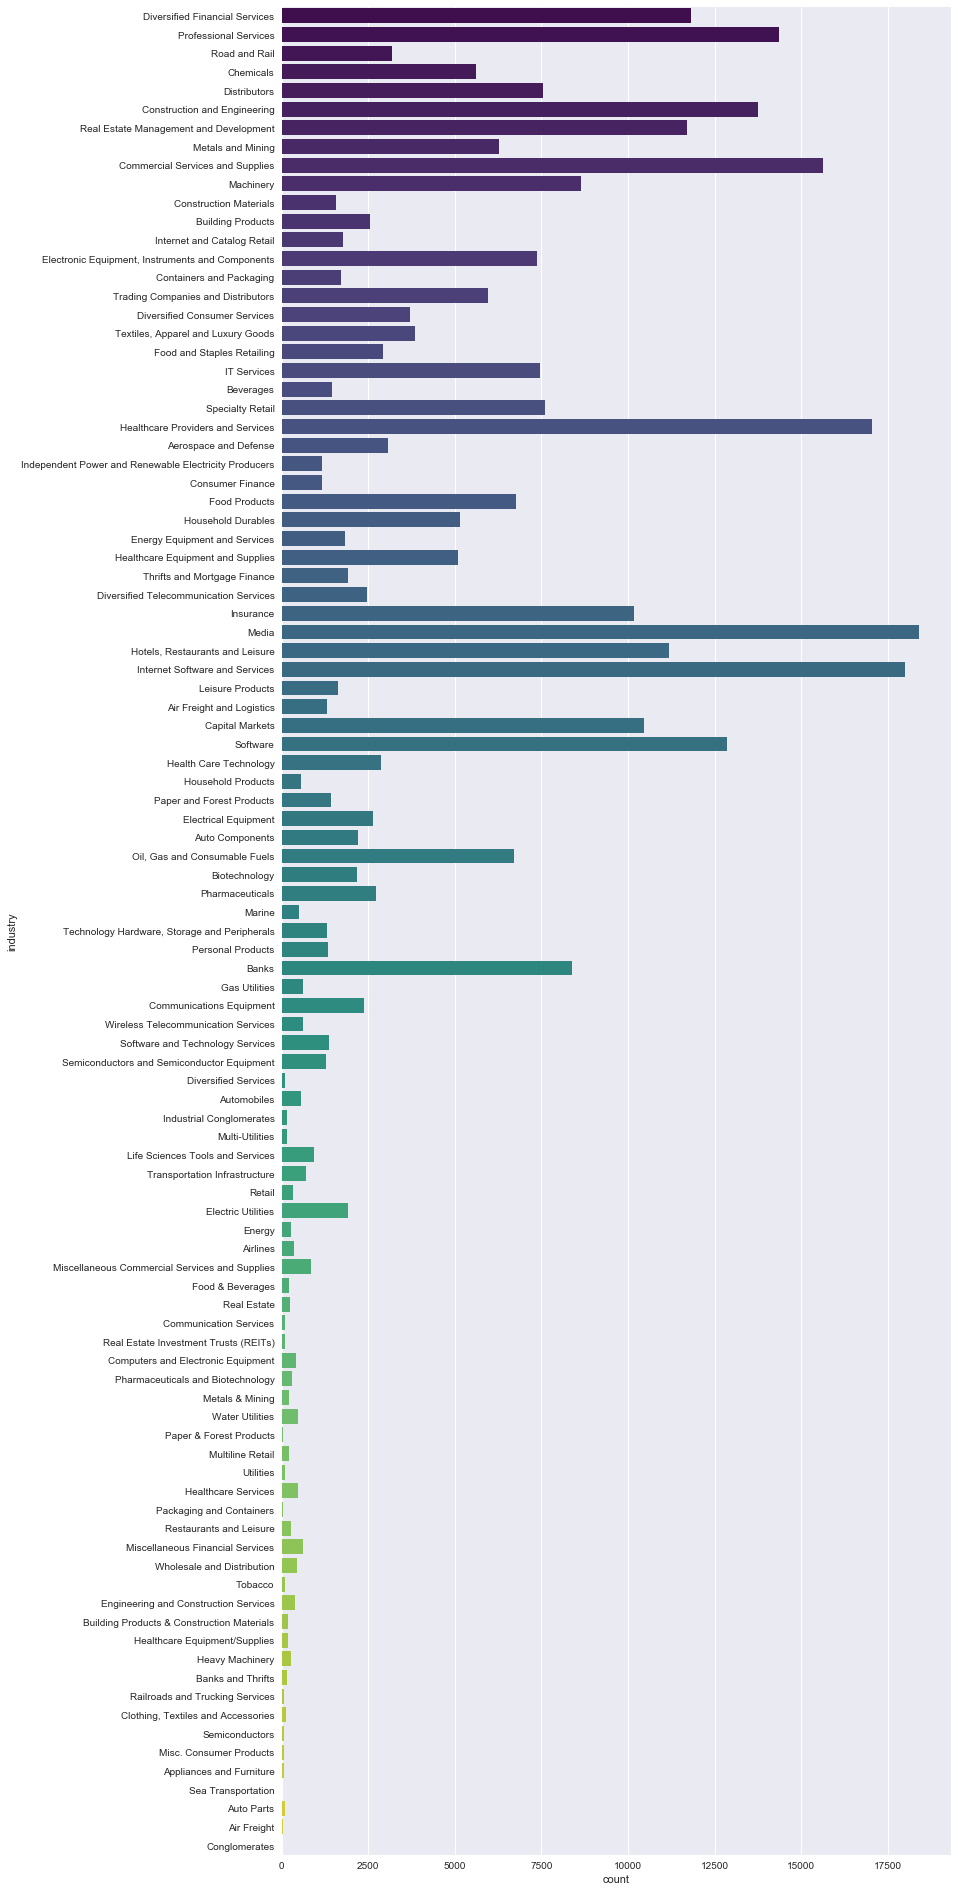

In [10]:
# Industries histogram
plt.figure(figsize=(12, 34))
sns.countplot(data=companies, y='industry', palette='viridis')

In [11]:
# Top 10 industries
print(companies['industry'].value_counts().head(10))
top_10_industry_names = list(companies['industry'].value_counts().head(10).index)

Media                                     18408
Internet Software and Services            17990
Healthcare Providers and Services         17040
Commercial Services and Supplies          15633
Professional Services                     14354
Construction and Engineering              13742
Software                                  12860
Diversified Financial Services            11824
Real Estate Management and Development    11698
Hotels, Restaurants and Leisure           11173
Name: industry, dtype: int64


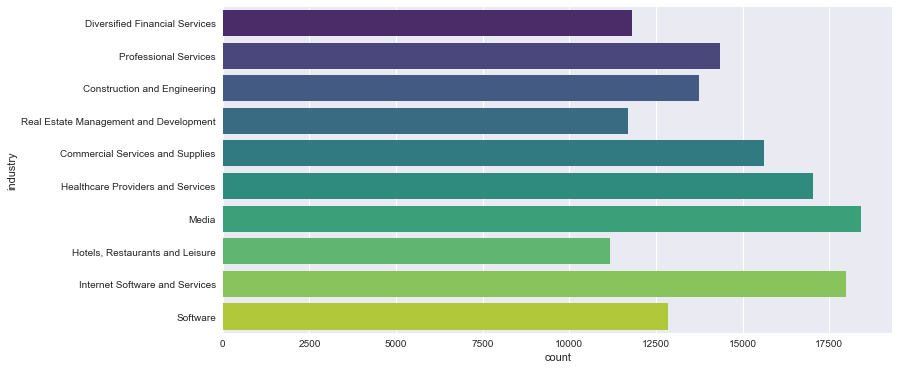

In [12]:
# Top 10 industries histogram
plt.figure(figsize=(12, 6))
sns.countplot(
    data=companies[companies['industry'].apply(lambda x: x in top_10_industry_names)], 
    y='industry', 
    palette='viridis'
)

### Clean companies data

In [13]:
# Drop duplicate companies: Number of unique companies
# is fewer than the length of the DataFrame
companies.drop_duplicates(subset='company', inplace=True)

In [14]:
# Strip away all characters that are not letters from company names 
# and split words into list
companies['company_words_list'] = companies['company'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x.lower()).split(' '))

In [15]:
# The new field 'company_clean' should be a list of words
companies.head()

,company,industry,company_words_list
0,A - E Employees Credit Union,Diversified Financial Services,"[a, , , e, employees, credit, union]"
1,"A & A Contract Services, Inc.",Professional Services,"[a, , , a, contract, services, , inc, ]"
2,"A & A Express, Inc.",Road and Rail,"[a, , , a, express, , inc, ]"
3,"A & A Fertilizer, Ltd.",Chemicals,"[a, , , a, fertilizer, , ltd, ]"
4,A & A Food Service. Inc.,Distributors,"[a, , , a, food, service, , inc, ]"


In [16]:
# Create list of words to exclude from company names:
#   - English stopwords
#   - Empty strings
#   - Letters of the alphabet
#   - Company entities
words_to_exclude = stopwords.words('english') + [''] + list(string.ascii_lowercase) + ['inc', 'llc', 'ltd', 'co']

In [17]:
# Remove words to exclude from company names
companies['company_words_list'] = companies['company_words_list'].apply(
    lambda words: [w for w in words if not w in words_to_exclude]
)

In [18]:
# Remove companies with no words left, i.e. empty lists
companies = companies[companies.astype(str)['company_words_list'] != '[]']

In [19]:
# Add additional column flattening company words lists into strings
companies['company_words_str'] = companies['company_words_list'].apply(lambda x: ' '.join(x))

In [20]:
# Check head of cleaned data
companies.head(30)

,company,industry,company_words_list,company_words_str
0,A - E Employees Credit Union,Diversified Financial Services,"[employees, credit, union]",employees credit union
1,"A & A Contract Services, Inc.",Professional Services,"[contract, services]",contract services
2,"A & A Express, Inc.",Road and Rail,[express],express
3,"A & A Fertilizer, Ltd.",Chemicals,[fertilizer],fertilizer
4,A & A Food Service. Inc.,Distributors,"[food, service]",food service
5,"A & A Industrial Piping, Inc.",Construction and Engineering,"[industrial, piping]",industrial piping
6,"A & A Industries, Inc.",Construction and Engineering,[industries],industries
7,"A & A Investment Properties, LLC",Real Estate Management and Development,"[investment, properties]",investment properties
8,"A & A Manufacturing Co., Inc.",Metals and Mining,[manufacturing],manufacturing
9,"A & A Mechanical, Inc.",Commercial Services and Supplies,[mechanical],mechanical


### Bag-of-words model

In [21]:
# Import modeling tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
# To simplify this exercise, let's filter the companies data and
# keep the top 10 industries only
top_10 = companies[companies['industry'].apply(lambda x: x in top_10_industry_names)]

In [23]:
# Check number of unique words in order to determine max number of features
# to include in bag of words model feature matrix
keywords = [keyword for keywords in list(top_10['company_words_list']) for keyword in keywords]
print('Unique company keywords:', pd.Series(keywords).nunique())

Unique company keywords: 68026


In [24]:
# Instantiate a CountVectorizer object to create feature matrix from bag of words 
vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = None,
    preprocessor = None,
    stop_words = None,
    max_features = 5000  # Most frequent company name words
) 

In [25]:
# Create sparse features matrix
features_matrix = vectorizer.fit_transform(top_10['company_words_str'])

In [26]:
# Print feature names
print(vectorizer.get_feature_names())

['aaa', 'aaron', 'ab', 'abacus', 'abbey', 'abbott', 'abc', 'aberdeen', 'abilene', 'able', 'abm', 'abrams', 'abroad', 'abs', 'absolute', 'abstract', 'ac', 'aca', 'acacia', 'academic', 'academy', 'accelerated', 'accelerator', 'accent', 'acceptance', 'access', 'accord', 'account', 'accountancy', 'accountants', 'accounting', 'accounts', 'accurate', 'ace', 'aci', 'acme', 'acorn', 'acquisition', 'acquisitions', 'acres', 'acs', 'act', 'action', 'active', 'actuarial', 'acuity', 'acumen', 'acute', 'ad', 'adam', 'adams', 'adaptive', 'add', 'addiction', 'addison', 'adesa', 'adirondack', 'adjustment', 'adler', 'administration', 'administrative', 'administrators', 'adp', 'ads', 'adult', 'advance', 'advanced', 'advancement', 'advantage', 'advent', 'adventist', 'adventure', 'adventures', 'advertising', 'advisers', 'advisor', 'advisors', 'advisory', 'advocate', 'ae', 'aegis', 'aerial', 'aero', 'aes', 'aetna', 'affairs', 'affiliate', 'affiliated', 'affiliates', 'affinity', 'affordable', 'ag', 'age', 'a

In [27]:
# Create training and test set splits, maintaining all 10 industry classes in both sets
X_train, X_test, y_train, y_test = train_test_split(
    features_matrix, 
    top_10['industry'], 
    stratify=top_10['industry'], 
    random_state=100
)

In [28]:
# Initialize a random forest classifier with 10 trees
forest = RandomForestClassifier(n_estimators = 100, max_features="sqrt") 

In [29]:
# Fit random forest classifier (and time how long it takes to estimate!)
start_time = timeit.default_timer()
forest.fit(X_train, y_train)
elapsed = (timeit.default_timer() - start_time) / 60
print('Time to fit model:', round(elapsed, 2), 'minutes')

Time to fit model: 3.65 minutes


### Model evaluation

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
# Generate predicted values
predicted = forest.predict(X_test)

In [32]:
# Calculate classification score, i.e. % of accurately classified companies
classification_score = accuracy_score(y_test, predicted)
print(
    round(classification_score * 100, 2), 
    '% of companies in the test set were correctly classified (of 35,950 test samples).',
    sep=''
)

57.32% of companies in the test set were correctly classified (of 35,950 test samples).


### Conclusion
This model outperforms randomly guessing (10%) the industry of a given company by 47 percentage points – not bad!